In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
%%capture
!wget https://ai-academy.ru/upload/files/football.csv

1). Проверка наличия пропусков через разницу в количестве записей в исходном файле и в файле после применения метода dropna(), устраняющего записи с пропусками:

In [ ]:
import pandas as pd

football = pd.read_csv('football.csv')
test = football.dropna()
if len(test.index) != len(football.index):
  display(football[football.isna().any(axis=1)])  # выводит на экран строки с NaN, если такие есть
else:
  print('Нет пропусков в данных, результат вывода функции, отображающей число пропусков, равен нулю для каждого столбца df:\n')
  display(football.isnull().sum())

Нет пропусков в данных, результат вывода функции, отображающей число пропусков, равен нулю для каждого столбца df:



Unnamed: 0         0
Name               0
Age                0
Nationality        0
Club               0
Value              0
Wage               0
Position           0
Crossing           0
Finishing          0
HeadingAccuracy    0
ShortPassing       0
Volleys            0
Dribbling          0
Curve              0
FKAccuracy         0
LongPassing        0
BallControl        0
Acceleration       0
SprintSpeed        0
Agility            0
Reactions          0
Balance            0
ShotPower          0
Jumping            0
Stamina            0
Strength           0
LongShots          0
Aggression         0
Interceptions      0
Positioning        0
Vision             0
Penalties          0
Composure          0
Marking            0
StandingTackle     0
SlidingTackle      0
GKDiving           0
GKHandling         0
GKKicking          0
GKPositioning      0
GKReflexes         0
dtype: int64

2).
Визуализация 1. 
Cравнение позиций футболистов из России по средней стоимости контракта и уровню средней заработной платы:

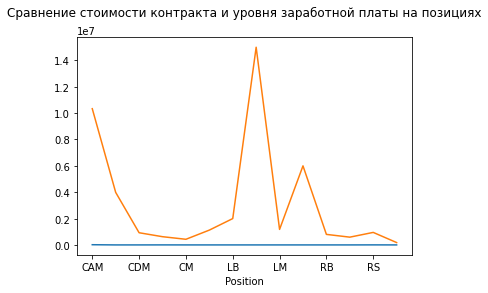

In [ ]:
russians = football.groupby('Nationality').get_group('Russia')
wage = russians.groupby('Position').Wage
contract = russians.groupby('Position').Value

wage.mean().plot(x = 'Position', y = 'Wage')
contract.mean().plot(x = 'Position', y = 'Value')
plt.title('Сравнение стоимости контракта и уровня заработной платы на позициях\n')
plt.show()

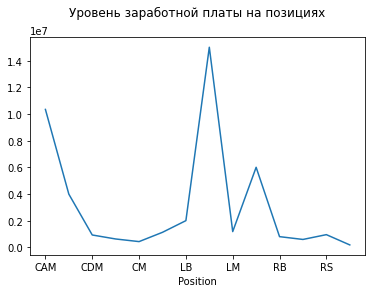

In [ ]:
contract.mean().plot(x = 'Position', y = 'Value')
plt.title('Уровень заработной платы на позициях\n')
plt.show()

Вывод: самая высокооплачиваемая футбольная позиция для контрактного найма в России: LB, следующая за ней - CAM - также самая высокооплачиваемая по уровню заработной платы.

Визуализация 2. Сравнение стоимости контрfкта для футболистов из России со стоимостью контракта для футболистов из 7 стран с самой высокой оплатой контракта: 

Средняя стоимость контракта футболиста из России: 2675555.5555555555 



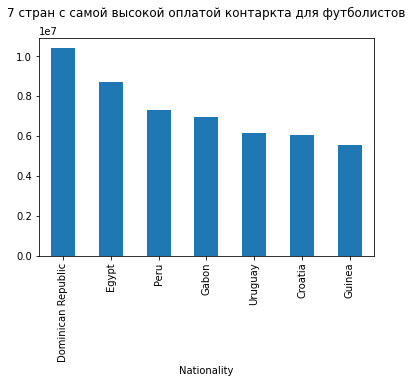

In [ ]:
countries = football.groupby('Nationality')
countries.Value.mean().nlargest(n=7).plot(kind='bar')
plt.title('7 стран с самой высокой оплатой контаркта для футболистов\n');
print(f'Средняя стоимость контракта футболиста из России: { countries.get_group("Russia").Value.mean() } \n')

Вывод: стоимость контракта с российским футболистом ниже стоимости таковой с футболистами из некоторых южных стран.

Визуализация 3. Страны, указанные у самого большого числа футболистов из списка:

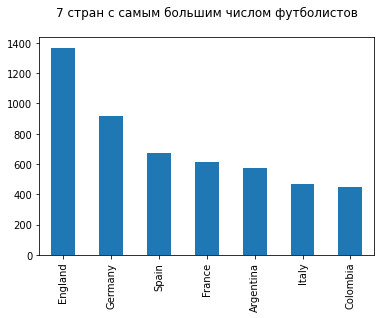

In [ ]:
football.Nationality.value_counts().nlargest(n=7).plot(kind='bar')
plt.title('7 стран с самым большим числом футболистов\n');

Вывод: с учетом информации с предыдущего графика, можно сделать вывод, что футболисты из стран с самой высокой средней стоимостью контракта не самые многочисленные в данном df.